In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [7]:
paths = []
labels = []
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        labels.append(filename.split('_')[-1].split('.')[0].lower())
        print(paths[-1], labels[-1])
print('Dataset is loaded')

archive\set\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav angry
archive\set\TESS Toronto emotional speech set data\OAF_angry\OAF_cab_angry.wav angry
archive\set\TESS Toronto emotional speech set data\OAF_angry\OAF_dab_angry.wav angry
archive\set\TESS Toronto emotional speech set data\OAF_angry\OAF_fail_angry.wav angry
archive\set\TESS Toronto emotional speech set data\OAF_angry\OAF_gap_angry.wav angry
archive\set\TESS Toronto emotional speech set data\OAF_angry\OAF_half_angry.wav angry
archive\set\TESS Toronto emotional speech set data\OAF_angry\OAF_jail_angry.wav angry
archive\set\TESS Toronto emotional speech set data\OAF_angry\OAF_keen_angry.wav angry
archive\set\TESS Toronto emotional speech set data\OAF_angry\OAF_late_angry.wav angry
archive\set\TESS Toronto emotional speech set data\OAF_angry\OAF_make_angry.wav angry
archive\set\TESS Toronto emotional speech set data\OAF_angry\OAF_nag_angry.wav angry
archive\set\TESS Toronto emotional speech set data\OAF_ang

In [3]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,archive\set\TESS Toronto emotional speech set ...,angry
1,archive\set\TESS Toronto emotional speech set ...,angry
2,archive\set\TESS Toronto emotional speech set ...,angry
3,archive\set\TESS Toronto emotional speech set ...,angry
4,archive\set\TESS Toronto emotional speech set ...,angry


In [4]:
df['label'].value_counts()

angry      42
happy      42
ps         41
sad        41
disgust    40
fear       40
neutral    40
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

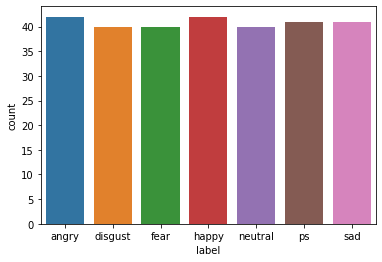

In [5]:
sns.countplot(df['label'])

In [6]:
df

,speech,label
0,archive\set\TESS Toronto emotional speech set ...,angry
1,archive\set\TESS Toronto emotional speech set ...,angry
2,archive\set\TESS Toronto emotional speech set ...,angry
3,archive\set\TESS Toronto emotional speech set ...,angry
4,archive\set\TESS Toronto emotional speech set ...,angry
...,...,...
281,archive\set\TESS Toronto emotional speech set ...,sad
282,archive\set\TESS Toronto emotional speech set ...,sad
283,archive\set\TESS Toronto emotional speech set ...,sad
284,archive\set\TESS Toronto emotional speech set ...,sad


In [27]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    

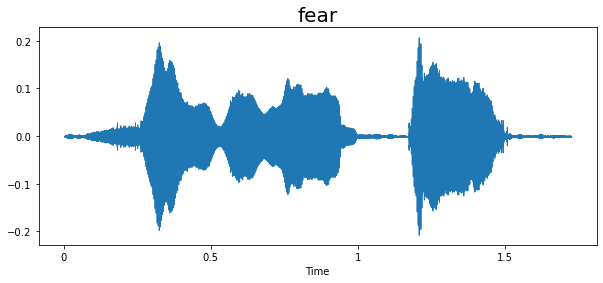

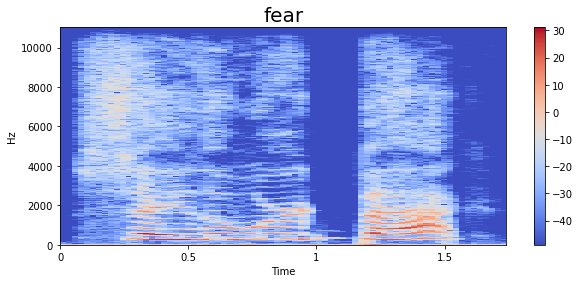

In [28]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

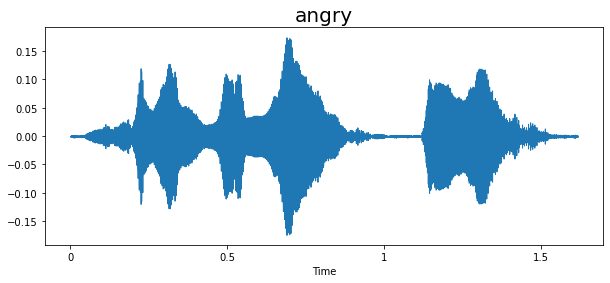

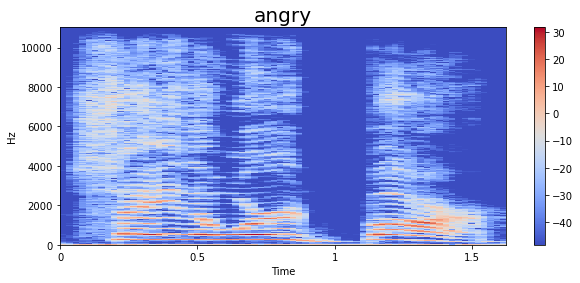

In [29]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

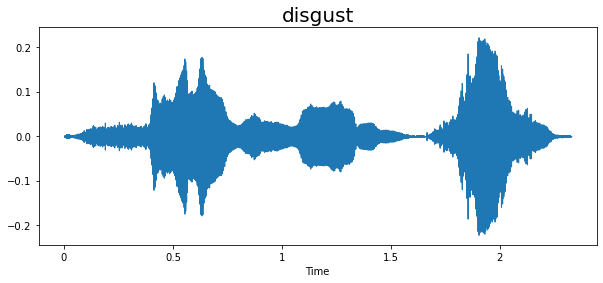

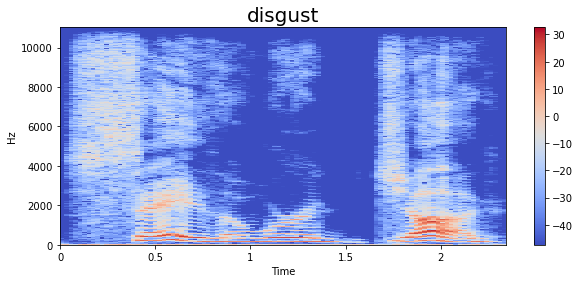

In [30]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[70]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

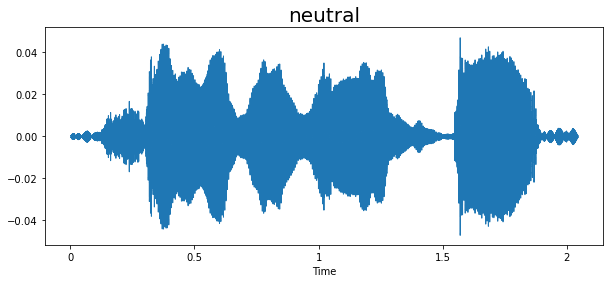

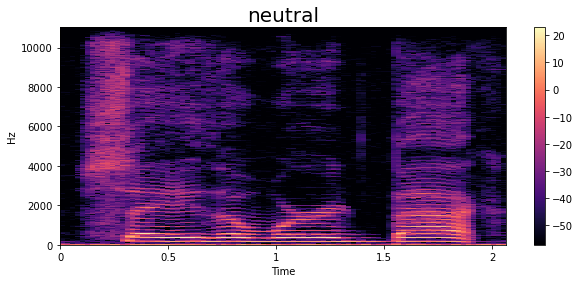

In [31]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

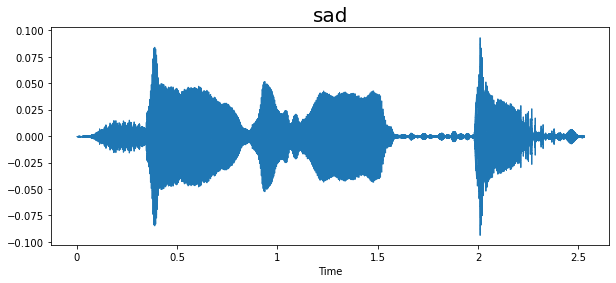

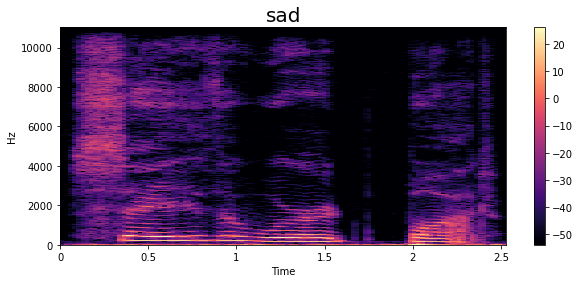

In [32]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[10]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

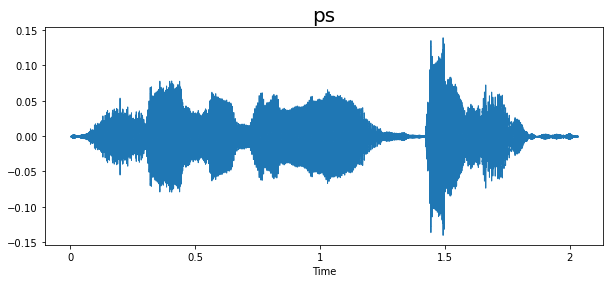

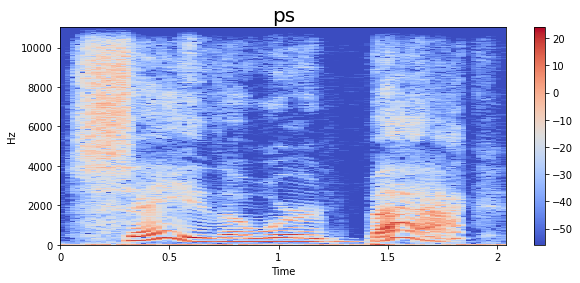

In [33]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

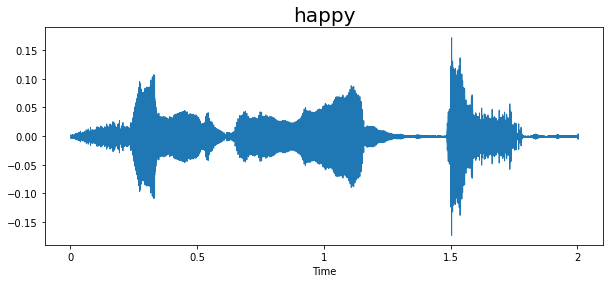

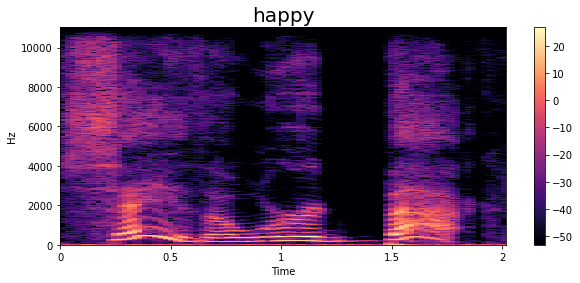

In [34]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [35]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [36]:
extract_mfcc(df['speech'][0])

array([-3.9660403e+02,  7.8255562e+01, -1.9569336e+01, -2.1489851e+01,
       -2.5252988e+00,  1.0445655e+01, -2.1044718e+01, -5.8948507e+00,
       -7.4592462e+00, -5.2469343e-01, -2.1899052e+00,  5.1469743e-01,
        5.5106121e-01,  1.1669712e+00,  2.6338913e+00,  3.3791060e+00,
       -4.8432755e+00, -4.3863821e+00, -1.8235216e+00, -1.0080047e+01,
       -7.6946750e+00, -1.4722953e+00, -7.2105827e+00,  9.8874454e+00,
        8.1233654e+00,  2.1820002e+01,  1.9096575e+01,  2.0362583e+01,
        1.2816748e+01,  8.4005709e+00,  2.0429319e-01,  5.1074352e+00,
        9.3775539e+00,  5.3786030e+00,  2.4897265e+00, -1.6286907e+00,
        4.7148476e+00,  9.0847263e+00,  2.0382314e+00, -1.8096156e+00],
      dtype=float32)

In [37]:
import csv
value = 0
try :
    input_file = open("X.csv","r+")
    reader_file = csv.reader(input_file)
    value = len(list(reader_file))
except:
    value = 0
value

5600

In [38]:
X_mfcc = 0
if value == 0:
    X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [39]:
X_mfcc

0

In [40]:
from numpy import savetxt, loadtxt
X = []
if value == 0:
    X = [x for x in X_mfcc]
    X = np.array(X)
    X.shape
    savetxt('X.csv', X, delimiter=',')
else:
    X = loadtxt('X.csv', delimiter=',')

In [41]:
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [42]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [43]:
y = y.toarray()

In [44]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 123)               61500     
_________________________________________________________________
dense (Dense)                (None, 64)                7936      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 231       
Total params: 71,747
Trainable params: 71,747
Non-trainable params: 0
____________________________________________________

In [46]:
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
9/9 [==============================] - 8s 285ms/step - loss: 1.8415 - accuracy: 0.2549 - val_loss: 1.8362 - val_accuracy: 0.2134
Epoch 2/100
9/9 [==============================] - 3s 329ms/step - loss: 1.5769 - accuracy: 0.4230 - val_loss: 1.7053 - val_accuracy: 0.3679
Epoch 3/100
9/9 [==============================] - 3s 268ms/step - loss: 1.2705 - accuracy: 0.5540 - val_loss: 1.1759 - val_accuracy: 0.5196
Epoch 4/100
9/9 [==============================] - 2s 259ms/step - loss: 0.9968 - accuracy: 0.6234 - val_loss: 0.8554 - val_accuracy: 0.6902
Epoch 5/100
9/9 [==============================] - 3s 301ms/step - loss: 0.7876 - accuracy: 0.7089 - val_loss: 0.5187 - val_accuracy: 0.8643
Epoch 6/100
9/9 [==============================] - 2s 190ms/step - loss: 0.5522 - accuracy: 0.8109 - val_loss: 0.3107 - val_accuracy: 0.9375
Epoch 7/100
9/9 [==============================] - 3s 323ms/step - loss: 0.4099 - accuracy: 0.8712 - val_loss: 0.2417 - val_accuracy: 0.9411
Epoch 8/100
9

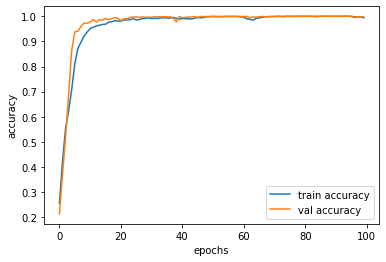

In [47]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

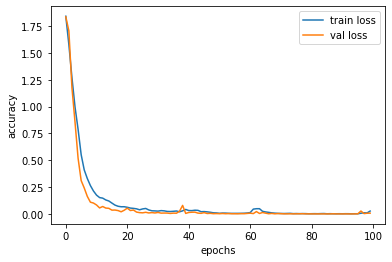

In [48]:
epochs = list(range(100))
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [49]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\kayak\anaconda3\python.exe -m pip install --upgrade pip' command.


In [50]:
pip install sounddevice

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\kayak\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 44100  # Sample rate
seconds = 5  # Duration of recording
startspeaking = input("Start Speaking? Click any key")
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('output.wav', fs, myrecording)  # Save as WAV file 

In [61]:
Audio('output.wav')

In [53]:
df['speech'][0]

'archive\\set\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav'

In [54]:
path = np.array(['output.wav'])[0]
X_mfcc = extract_mfcc(path)

In [55]:
X = [X_mfcc]
X = np.array(X)
X = np.expand_dims(X, -1)
X.shape

(1, 40, 1)

In [56]:
predicted_emotion = model.predict(X)
predicted_emotion

array([[3.7363754e-06, 9.9997139e-01, 5.3185105e-09, 1.0477670e-06,
        9.7823226e-07, 1.3667132e-05, 9.1873417e-06]], dtype=float32)

In [57]:
emotions=['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprised', 'sad']
emotions[np.argmax(predicted_emotion)]

'disgust'